# Accessing the KEGG database

In [1]:
import biu as biu
import matplotlib.pylab as plt

where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

kegg = biu.db.KEGG()
hms = biu.maps.HumanS()

D: Initializing the SQLiteResourceManager object NOW


In [2]:
print(kegg)

KEGG object
 Where: /exports/molepi/tgehrmann/data
 Version: human
 Objects:
  * [ ] _orgMap
  * [ ] _featureData
 Files:
  * [X] org_map : /exports/molepi/tgehrmann/data/kegg_human/org_map.tsv
  * [X] feature_data : /exports/molepi/tgehrmann/data/kegg_human/feature_data.sqlite



## Get a list of pathways and genes

In [3]:
print("Number of pathways: %d" % len(kegg.getPathways()))
print("Number of genes: %d" % len(kegg.getGenes()))

Number of pathways: 325
Number of genes: 7373


D: Initializing the TSVMapResourceManager object NOW
D: Loading the index from pickle


## Get the pathways that a specific gene is in
Look up with the geneID

In [4]:
print("Number of pathways MTOR is in: %d" % len(kegg.getGenePathways(hms.getSymbolGeneID("MTOR")[0])))

Number of pathways MTOR is in: 37


## Get the genes in a pathway
Lookup with KEGG pathway ID

In [5]:
print("Number of genes in path:hsa05230: %d" % len(kegg.getPathwayGenes("path:hsa05230")))

Number of genes in path:hsa05230: 65


## Get information about a specific KEGG pathway

In [6]:
print(kegg.getPathwayInfo("hsa04740").split('\n')[1][4:].strip())

Olfactory transduction - Homo sapiens (human)


D: Initializing the SQLDictResourceManager object NOW


## Perform an enrichment analysis with KEGG

If you have a gene set, you can easily perform an enrichment on this geneset with the enrich function
You can also specify a specific subset of pathways to test using the `pathways=[]` option.

In [10]:
myGeneSet = kegg.getPathwayGeneIDs("hsa04740")[:-50]
enrichRes = kegg.enrich(myGeneSet, correctionType='bonferroni')
enrichRes[enrichRes.q < 0.05].sort_values("q")

,pathway,method,c2statistic,oddsratio,p,q
208,path:hsa04740,fisher,NaN,inf,0.000000e+00,0.000000e+00
86,path:hsa01100,fisher,NaN,0.000000,7.883853e-32,2.562252e-29
292,path:hsa05206,fisher,NaN,0.000000,3.872907e-07,1.258695e-04
129,path:hsa04080,fisher,NaN,0.000000,8.070172e-07,2.622806e-04
121,path:hsa04060,fisher,NaN,0.000000,1.219464e-06,3.963258e-04
259,path:hsa05032,chi2,23.14926,100.000000,1.499009e-06,4.871779e-04
145,path:hsa04151,fisher,NaN,0.156301,2.491368e-05,8.096945e-03
212,path:hsa04810,fisher,NaN,0.000000,3.270368e-05,1.062870e-02
167,path:hsa04510,fisher,NaN,0.000000,4.921592e-05,1.599517e-02
255,path:hsa05016,fisher,NaN,0.000000,7.416495e-05,2.410361e-02


## Make a pretty plot

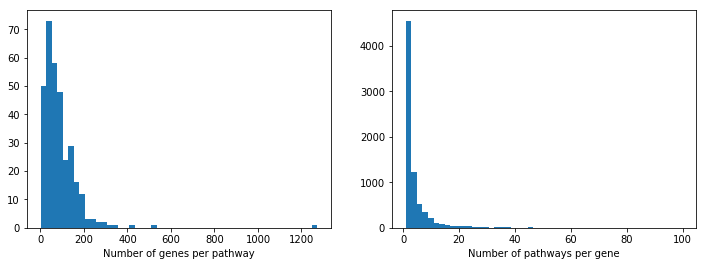

In [8]:
fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

# How many genes are there per kegg pathway?
genesPerPathway = [ len(kegg.getPathwayGenes(p)) for p in kegg.getPathways() ]
pathwaysPerGene = [ len(kegg.getGenePathways(g)) for g in kegg.getGenes() ]

axes[0].hist(genesPerPathway, bins=50)
axes[0].set_xlabel("Number of genes per pathway")
axes[1].hist(pathwaysPerGene, bins=50)
axes[1].set_xlabel("Number of pathways per gene")
plt.show()